In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score ,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import KFold

# Parte 1

In [2]:
oj = pd.read_csv('OJ.csv')
oj['purchaseNum'] = list(map(lambda x:1 if x=='CH' else -1, oj.Purchase))
oj = oj.drop(['Store7'],axis=1)
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,purchaseNum
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,-1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1


In [3]:
x_features = oj.columns[2:-1]
print(x_features)

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')


In [4]:
# Normalizar
oj[x_features] = oj[x_features].apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)))

## Lineal

In [5]:
def svc():
    params={
        'C':[2**i for i in range(-2,15,1)],
        'kernel':['linear']
    }
    model = SVC()
    return model, params

In [6]:
model, params = svc()

gscv = GridSearchCV(model,
                    params,
                    cv=2,
                    #evaluar el modelo
                    scoring={'f1_score':make_scorer(f1_score,average='weighted')},
                    refit='f1_score',
                    return_train_score= True)

gscv.fit(oj[x_features],oj['purchaseNum'])

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit='f1_score', return_train_score=True,
       scoring={'f1_score': make_scorer(f1_score, average=weighted)},
       verbose=0)

In [7]:
gscv.best_params_

{'C': 64, 'kernel': 'linear'}

## Radial

In [8]:
def svc():
    params={
        'C':    [i for i in np.linspace(0.0001,4,20)],
        'gamma':[i for i in np.linspace(0.0001,4,20)],
        'kernel':['rbf']
    }
    model = SVC()
    return model, params


In [9]:
model, params = svc()

gscv = GridSearchCV(model,
                    params,
                    cv=2 ,
                    scoring={'f1_score':make_scorer(f1_score,average='weighted')},
                    refit='f1_score',
                    return_train_score= True)

gscv.fit(oj[x_features],oj['purchaseNum'])

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mneira011/

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.21062105263157893, 0.4211421052631579, 0.6316631578947368, 0.8421842105263158, 1.0527052631578948, 1.2632263157894736, 1.4737473684210525, 1.6842684210526315, 1.8947894736842106, 2.10531052631579, 2.3158315789473685, 2.5263526315789475, 2.7368736842105266, 2.9473947368421...79157894736842, 3.3684368421052633, 3.5789578947368423, 3.7894789473684214, 4.0], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit='f1_score', return_train_score=True,
       scoring={'f1_score': make_scorer(f1_score, average=weighted)},
       verbose=0)

In [10]:
gscv.best_params_

{'C': 0.6316631578947368, 'gamma': 0.8421842105263158, 'kernel': 'rbf'}

# Parte 2

In [11]:
spam = pd.read_csv('spam7.csv')
spam.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [12]:
spam['spamNum'] = list(map(lambda x:1 if x=='y' else -1, spam.yesno))

In [13]:
x_features = spam.columns[1:-2]
print(x_features)

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make'], dtype='object')


In [14]:
# Normalizar
spam[x_features] = spam[x_features].apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)))

## Lineal

In [ ]:
model, params = svc()

gscv = GridSearchCV(model,
                    params,
                    cv=8,
                    #evaluar el modelo
                    scoring= { 'f1_score':make_scorer(f1_score,average='weighted'),
                            'precision':make_scorer(precision_score,average='weighted'),
                            'recall':make_scorer(recall_score,average='weighted')},
                    refit='f1_score',
                    return_train_score= True)

gscv.fit(spam[x_features],spam['spamNum'])
gscv.best_params_

In [17]:
train, test = train_test_split(spam,test_size = 0.50)

In [20]:
#calcular modelo y score 
test_score = []
train_score = []

c = [2**i for i in range(4,15,1)]
kf = KFold(n_splits=2)
kf.get_n_splits(train[x_features])
for i in c:
    test_score_temp = []
    train_score_temp = []
    c_temp = i
    kf = KFold(n_splits=2)
    kf.get_n_splits(train[x_features])
    for train_index, test_index in kf.split(train[x_features]):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = train.iloc[train_index][x_features], train.iloc[test_index][x_features]
        y_train, y_test = train.iloc[train_index]['spamNum'], train.iloc[test_index]['spamNum']
        #test
        svc = SVC(kernel = 'linear', C = i)
        svc.fit(test[x_features],test.spamNum)
        test_score_temp.append(f1_score(svc.predict(test[x_features]),test.spamNum))
        train_score_temp.append(f1_score(svc.predict(train[x_features]),train.spamNum))
    test_score_temp =  np.array(test_score_temp)
    train_score_temp = np.array(train_score_temp)
    test_score.append(np.mean(test_score_temp))
    train_score.append(np.mean(train_score_temp))
    

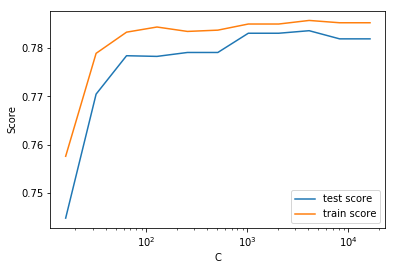

In [21]:
plt.plot(c,test_score,label = 'test score')
plt.plot(c,train_score,label = 'train score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()

c

## Radial

In [22]:
#calcular modelo y score 
test_score = []
train_score = []

c = [2**i for i in range(4,15,1)]
gs = [2**i for i in range(4,15,4)]
kf = KFold(n_splits=2)
kf.get_n_splits(train[x_features])
for i in c:
    for g in gs:
        test_score_temp = []
        train_score_temp = []
        c_temp = i
        kf = KFold(n_splits=2)
        kf.get_n_splits(train[x_features])
        for train_index, test_index in kf.split(train[x_features]):
            #print("TRAIN:", train_index, "TEST:", test_index)
            x_train, x_test = train.iloc[train_index][x_features], train.iloc[test_index][x_features]
            y_train, y_test = train.iloc[train_index]['spamNum'], train.iloc[test_index]['spamNum']
            #test
            svc = SVC(kernel = 'linear', C = i, gamma = g)
            svc.fit(test[x_features],test.spamNum)
            test_score_temp.append(f1_score(svc.predict(test[x_features]),test.spamNum))
            train_score_temp.append(f1_score(svc.predict(train[x_features]),train.spamNum))
    test_score_temp =  np.array(test_score_temp)
    train_score_temp = np.array(train_score_temp)
    test_score.append(np.mean(test_score_temp))
    train_score.append(np.mean(train_score_temp))

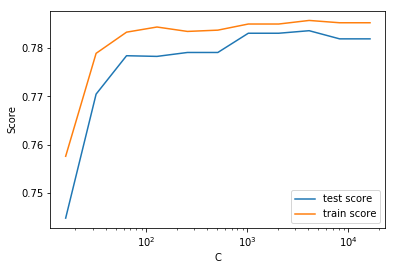

In [23]:
plt.plot(c,test_score,label = 'test score')
plt.plot(c,train_score,label = 'train score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()